### **KNN — K Nearest Neighbour**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report, confusion_matrix)

In [2]:
# Load dataset
iris = load_iris()
X = iris.data 
y = iris.target

In [3]:
# Create a DataFrame for better understanding
df = pd.DataFrame(X, columns=iris.feature_names)
df["target"] = y

# displaying the first few rows
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [6]:
# Build KNN Model (try different values of K)
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [7]:
y_pred = knn_model.predict(X_test)

In [8]:
# Evalution
print("\nConfusion Metrics:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Metrics:
[[19  0  0]
 [ 0  9  4]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.69      0.82        13
           2       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45



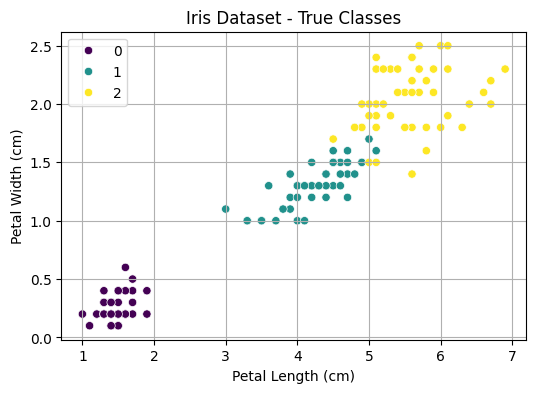

In [9]:
# Visualization → Using Petal Length and Petal Width for visualization
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x=iris.feature_names[2], y=iris.feature_names[3], hue=iris.target, palette="viridis")
plt.title(f'Iris Dataset - True Classes')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.grid(True)
plt.show()

✅ 1. Decision Boundary (2D) — Petal Length vs Petal Width



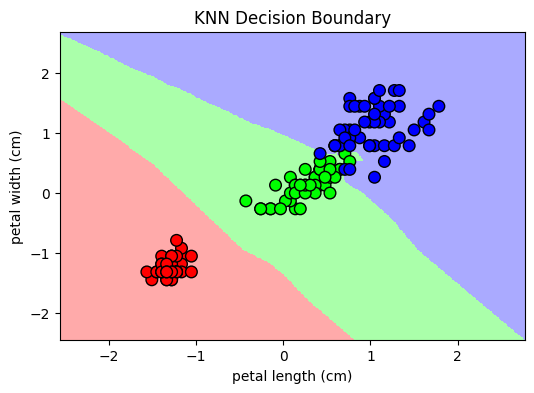

In [10]:
from matplotlib.colors import ListedColormap

def plot_knn_decision_boundary(knn_model, X, y, feature_names, h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure(figsize=(6,4))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=70)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("KNN Decision Boundary")
    plt.show()

# Use only two features for plotting
X_plot = df[[iris.feature_names[2], iris.feature_names[3]]].values
y_plot = iris.target

# Scale features
X_plot_scaled = scaler.fit_transform(X_plot)

# Fit model on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d.fit(X_plot_scaled, y_plot)

# Plot decision boundary
plot_knn_decision_boundary(knn_2d, X_plot_scaled, y_plot, [iris.feature_names[2], iris.feature_names[3]])


✅ 2. Predicted vs Actual — Comparison Scatter Plot



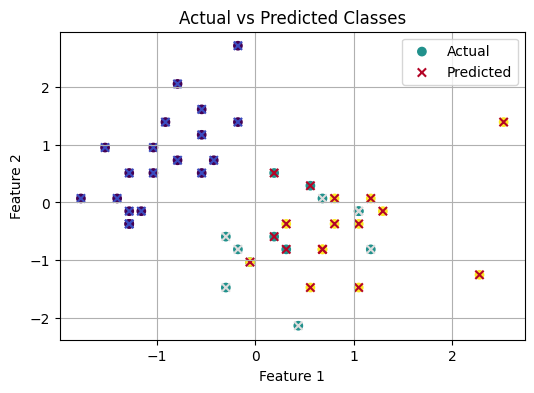

In [11]:
plt.figure(figsize=(6,4))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', label='Actual', marker='o')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', label='Predicted', marker='x')
plt.title('Actual vs Predicted Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


`Manhathon and Minkoswaki Distance` 

In [13]:
from sklearn.neighbors import KNeighborsClassifier

model1 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)  # Manhattan
model1.fit(X_train,y_train)
Y1 = model1.predict(X_test)
print(f"{classification_report(y_test, Y1)}")

model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Minkoswaki
model2.fit(X_train,y_train)
Y2 = model2.predict(X_test)
print(f"{classification_report(y_test, Y2)}")

model3 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=500)  # Chebyshev
model3.fit(X_train,y_train)
Y3 = model3.predict(X_test)
print(f"{classification_report(y_test, Y3)}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.77      0.87        13
           2       0.81      1.00      0.90        13

    accuracy                           0.93        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.95      0.93      0.93        45

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy        

### **`KNN with regression`**

R² Score: 0.4412875170912407
MSE: 3326.9833707865164


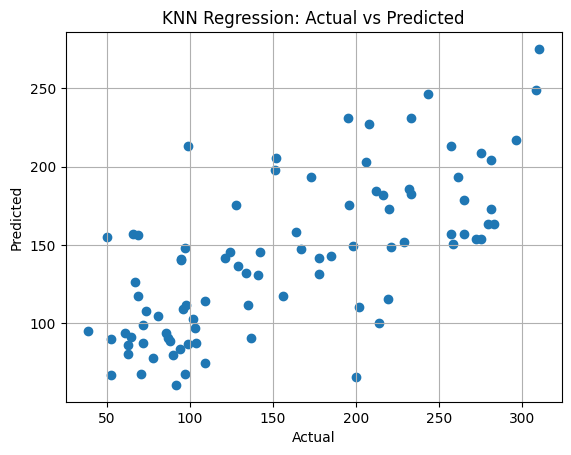

In [18]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load data
data = load_diabetes()
X = data.data
y = data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("KNN Regression: Actual vs Predicted")
plt.grid()
plt.show()
